In [2]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
from jupyter_datatables import init_datatables_mode
from plotly.offline import download_plotlyjs, plot, init_notebook_mode,iplot
init_notebook_mode(connected=True)

In [8]:
df1.loc[df1['Year'].isin([0]), 'Year'] = 0

In [6]:
# with open('vgsales.csv') as f:
#     file = csv.reader(f)
#     for row in file:
#         print(row)
df = pd.read_csv('vgsales.csv', index_col='Rank' )

In [ ]:
df1.head(500).to_csv('vgsalesTableau.csv')

In [9]:
rows, columns = df.shape
print(f'rows={rows}, columns={columns}')

rows=16598, columns=10


In [10]:
pd.reset_option('display.max_row', None)

In [11]:
df1 = df.copy()

In [ ]:
df1['Year']

In [12]:
# checking the datatypes of the columns
df1.dtypes

Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [13]:
# checking the sum of nullvalues on the data set
df1.isnull().sum()

Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [14]:
#function to clean and remove unwanted formats
def cleaning():
    """Function for cleaning and removing special characters
    """
    return df1['Name'].str.replace(r'a-zA-Z0-9', regex=True)

In [15]:
# replacing nullvalues with 0
df1['Year']=df['Year'].fillna(1980).astype(int)

In [16]:
df1['Publisher'].unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       'Atari', '505 Games', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment',
       'Sony Computer Entertainment Europe', 'Square Enix', 'LucasArts',
       'Virgin Interactive', 'Warner Bros. Interactive Entertainment',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games',
       'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive',
       'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios',
       nan, 'Majesco Entertainment', 'Codemasters', 'Red Orb', 'Level 5',
       'Arena Entertainment', 'Midway Games', 'JVC', 'Deep Silver',
       '989 Studios', 'NCSoft', 'UEP Systems', 'Parker Bros.', 'Maxis',
       'Imagic', 'Tecmo Koei', 'Valve Software', 'ASCII Entertainment',


In [ ]:
# Inserting the month format on the year column and date 

# df1['Year'] = pd.to_datetime(df1['Year'])
# df1['Year'] = df1['Year'].dt.strftime('%Y')

# Exploratory Data Analysis

In [17]:
# finding correlation between the numerical columns
Relation = df1[df1.columns[5:]].corr()

In [18]:
Relation

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
NA_Sales,1.000000,0.767727,0.449787,0.634737,0.941047
EU_Sales,0.767727,1.000000,0.435584,0.726385,0.902836
JP_Sales,0.449787,0.435584,1.000000,0.290186,0.611816
Other_Sales,0.634737,0.726385,0.290186,1.000000,0.748331
Global_Sales,0.941047,0.902836,0.611816,0.748331,1.000000


In [19]:
# Groupby on the columns
GenrePublished = df1.groupby(['Genre'])[df1.columns[5:]].agg(['sum', 'mean'])

In [20]:
PublisherGrouped = df1.groupby(['Publisher'])[df1.columns[5:]].agg(['sum', 'mean'])

In [21]:
df1.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,2005.975298,0.264667,0.146652,0.077782,0.048063,0.537441
std,6.679972,0.816683,0.505351,0.309291,0.188588,1.555028
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


# Visualizating the data

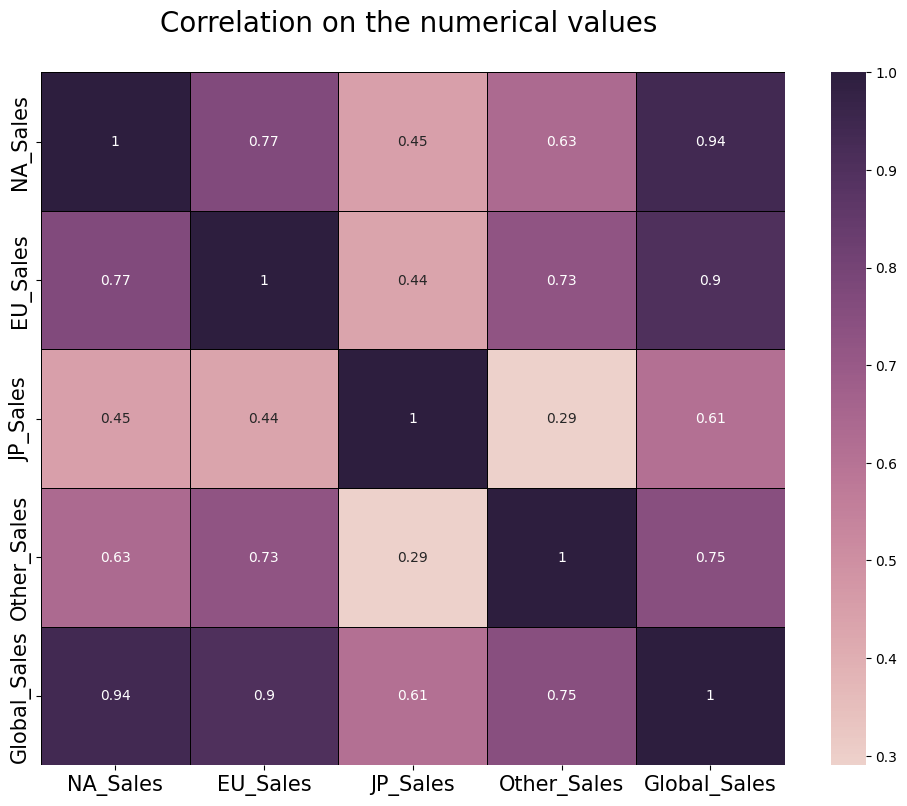

In [22]:
# heatmap on the correlation
plt.subplots(figsize=(12, 9))
sns.heatmap(Relation, annot=True, linewidths=.5, linecolor='black',cmap=sns.cubehelix_palette(as_cmap=True), 
            cbar= True, xticklabels='auto', yticklabels='auto')
plt.title('Correlation on the numerical values \n', fontsize=20)

plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.show()


In [ ]:
# bar chart for the data on a subplot
# fig, ((ax1, ax2), (ax3, ax4))  = plt.subplots(nrows=2, ncols=2, figsize=(18,10))
class creatingsubplot:
    def __init__(self,data):
        self.data = data
        
    def createsubplot(self):
        fig, axes  = plt.subplots(nrows=3, ncols=2, figsize=(19,15))

        self.create_subplot(axes[0,0], 'NA_Sales', 'sum')
        self.create_subplot(axes[0,1], 'NA_Sales', 'mean')
        self.create_subplot(axes[1,0], 'EU_Sales', 'sum')
        self.create_subplot(axes[1,1], 'EU_Sales', 'mean')
        self.create_subplot(axes[2,0], 'JP_Sales', 'sum')
        self.create_subplot(axes[2,1], 'JP_Sales', 'mean')

        axes[0,0].set_xlabel('Sum',fontsize=14, fontweight='bold')
        axes[0,0].tick_params(axis='both', labelsize=14)

        axes[0,1].set_xlabel('mean',fontsize=14, fontweight='bold')
        axes[0,1].tick_params(axis='both', labelsize=14)

        axes[1,0].set_xlabel('Sum',fontsize=14, fontweight='bold')
        axes[1,0].tick_params(axis='both', labelsize=14)

        axes[1,1].set_xlabel('mean',fontsize=14, fontweight='bold')
        axes[1,1].tick_params(axis='both', labelsize=14)

        axes[2,0].set_xlabel('sum',fontsize=14, fontweight='bold')
        axes[2,0].tick_params(axis='both', labelsize=14)

        axes[2,1].set_xlabel('mean',fontsize=14, fontweight='bold')
        axes[2,1].tick_params(axis='both', labelsize=14)
       
        plt.tight_layout()
        plt.show()

    def create_subplot(self, ax, region, agg_funct):
        sns.barplot(
            data=self.data,
            x=self.data[region][agg_funct],
            y='Genre',
            orient = 'h',
            palette='colorblind',
            hue = 'Genre',
            legend = False,
            ax=ax
        )
        
        ax.set_title(f'{region} {agg_funct.capitalize()} for the Genre', fontsize=20)
        ax.set_ylabel('Genre', fontsize=20, fontweight='bold')
       

if __name__ == "__main__":
    plot = creatingsubplot(GenrePublished)
    plot.createsubplot()

In [ ]:
# subplot design using line chart
class creatingLineSubplots:
    def __init__(self, data):
        self.data = data
        
    def linesubplot(self):
        fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))

        self.line_subplot(axes[0,0], 'Other_Sales', 'sum')
        self.line_subplot(axes[0,1], 'Other_Sales', 'mean')
        self.line_subplot(axes[1,0], 'Global_Sales', 'sum')
        self.line_subplot(axes[1,1], 'Global_Sales', 'sum')

        
        axes[0,0].set_xlabel('Sum',fontsize=14, fontweight='bold')
        axes[0,0].tick_params(axis='both', labelsize=14)

        axes[0,1].set_xlabel('mean',fontsize=14, fontweight='bold')
        axes[0,1].tick_params(axis='both', labelsize=14)

        axes[1,0].set_xlabel('Sum',fontsize=14, fontweight='bold')
        axes[1,0].tick_params(axis='both', labelsize=14)

        axes[1,1].set_xlabel('mean',fontsize=14, fontweight='bold')
        axes[1,1].tick_params(axis='both', labelsize=14)

        plt.tight_layout()
        plt.show()

    def line_subplot(self, ax, regions, agg_function):
        sns.lineplot(
            data= self.data,
            x = self.data[regions][agg_function],
            y = 'Genre',
            marker='o',
            color='b',
            ax=ax
        )
        ax.set_title(f'{regions} {agg_function.capitalize()} for the Genre', fontsize=20)
        ax.set_ylabel('Genre', fontsize=20, fontweight='bold')

if __name__ == "__main__":
    lineplot = creatingLineSubplots(GenrePublished)
    lineplot.linesubplot()

In [ ]:
#scatter plot for the graph to show the outliners for each continent sale
class scatterplotdesign:
    def __init__(self, data):
        self.data=data
        
    def scatter_plot(self):
        fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
        self.scatterDiagram(axes[0,0], 'NA_Sales', 'sum', 'mean')
        self.scatterDiagram(axes[0,1], 'JP_Sales', 'sum', 'mean')
        self.scatterDiagram(axes[1,0], 'EU_Sales', 'sum', 'mean')
        self.scatterDiagram(axes[1,1], 'Other_Sales', 'sum', 'mean')

        axes[0,0].set_xlabel('mean',fontsize=14, fontweight='bold')
        axes[0,0].tick_params(axis='both', labelsize=14)

        axes[0,1].set_xlabel('mean',fontsize=14, fontweight='bold')
        axes[0,1].tick_params(axis='both', labelsize=14)

        axes[1,0].set_xlabel('mean',fontsize=14, fontweight='bold')
        axes[1,0].tick_params(axis='both', labelsize=14)

        axes[1,1].set_xlabel('mean',fontsize=14, fontweight='bold')
        axes[1,1].tick_params(axis='both', labelsize=14)

        plt.tight_layout()
        plt.show()

    def scatterDiagram(self, ax, region, agg_funct, agg_funct2):
        sns.scatterplot(
            data= self.data,
            x = self.data[region][agg_funct2],
            y = self.data[region][agg_funct],
            ax = ax,
            hue = 'Genre'
        )
        ax.set_title(f'{region} {agg_funct.capitalize()} for the Genre', fontsize=20)
        ax.set_ylabel('sum', fontsize=20, fontweight='bold')
        ax.legend(title="Genre", fontsize=8, title_fontsize=14, loc="upper left")

        

if __name__ == "__main__":
    plot = scatterplotdesign(GenrePublished)
    plot.scatter_plot()


In [ ]:
# year and sales 
grouped_samples = pd.DataFrame(df1[['Year','Publisher','NA_Sales']]

In [ ]:
pd.set_option('display.max_row', None)

In [ ]:
grouped_Nintendo = grouped_samples[grouped_samples['Publisher'].isin(['Nintendo'])]